# Insurance Cross-Selling: Binary Classification Prediction| PS4E7

# Data Details:

* Rows: 11,504,798
* Columns: 12
* This is the Binary Classification of Insurance Cross Selling Dataset.
* It consists of three Files such as Train, test and sample submission
* The Training data consists of 11504798 rows and 12 columns
* The columns of Training Data are id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response.
* The test Data consists of 7669866 rows and 11 columns.
* The test Data includes these columns such as id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage.
* while the sample submission consists of 7669866 rows and 2 columns.
* The columns of sample submission includes id, Response.
* The dataset for this competition (both train and test) was generated from a deep learning model trained on the Health Insurance Cross Sell Prediction Data dataset


# Files:
* train.csv - the training dataset; Response is the binary target
* test.csv - the test dataset; your objective is to predict the probability of Response for each row
* sample_submission.csv - a sample submission file in the correct format

# Objectives


* This is Binary Classification of Insurance Cross Selling Competition Data.
* The aim to take this is to predict which customers respond positively to an automobile insurance offer.
* For this I firstly took the detailed overview about the data and then I create various visualization plots in the form of subplots such as countplot, pairplot, violin plot and piechart to take deep insights about Data.
* Then I visualize the outliers tthrough Boxplot and apply the winsorization to take accuracte and best results.
* Then I apply the enhanced Feature Engineering.
* Then do the model Training and Stacking to take the enhanced predictions

# About Training Data

* Rows: 11,504,798
* Columns: 12
* id: Unique identifier for each record
* Gender: Gender of the individual
* Age: Age of the individual
* Driving_License: Indicates if the individual has a driving license
* Region_Code: Code representing the region
* Previously_Insured: Indicates if the individual was previously insured
* Vehicle_Age: Age of the vehicle
* Vehicle_Damage: Indicates if the vehicle has damage
* Annual_Premium: Annual premium amount
* Policy_Sales_Channel: Channel through which the policy was sold
* Vintage: Number of days since the individual became a customer
* Response: Target variable indicating whether the individual will buy the insurance (binary)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance-cross-sell-prediction-data/train.csv
/kaggle/input/health-insurance-cross-sell-prediction-data/test.csv
/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv


In [2]:
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 23.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
# import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import display, HTML
import matplotlib.patches as patches
from scipy.stats.mstats import winsorize
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data Understanding

In [4]:
# Function to style tables
def style_table(df):
    styled_df = df.style.set_table_styles([
        {"selector": "th", "props": [("color", "white"), ("background-color", "#6a1b9a")]}
    ]).set_properties(**{"text-align": "center"}).hide(axis="index")
    return styled_df.to_html()

# Function to generate random shades of color
def generate_random_color():
    color = "#{:02x}{:02x}{:02x}".format(
        random.randint(150, 255),
        random.randint(150, 255),
        random.randint(150, 255)
    )
    return color

# Function to create styled heading with emojis
def styled_heading(text, background_color='#6a1b9a', text_color='white'):
    return f"""
    <div style="
        text-align: center;
        background: {background_color};
        color: {text_color};
        padding: 20px;
        font-size: 24px;
        font-weight: bold;
        border-radius: 10px;
        margin-bottom: 20px;
        box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);
        border: 2px solid {background_color};
    ">
        {text}
    </div>
    """

def print_dataset_analysis(dataset, dataset_name, n_top=5, heading_color='#6a1b9a', text_color='white'):
    heading = styled_heading(f"📊 {dataset_name} Overview", heading_color, text_color)
    display(HTML(heading))
    
    display(HTML("<h2 style='font-size: 20px; margin-top: 20px;'>📏 Shape of the Dataset</h2>"))
    display(HTML(f"<p>{dataset.shape[0]} rows and {dataset.shape[1]} columns</p>"))
    
    display(HTML("<h2 style='font-size: 20px; margin-top: 20px;'>🔍 First 5 Rows</h2>"))
    display(HTML(style_table(dataset.head(n_top))))
    
    display(HTML("<h2 style='font-size: 20px; margin-top: 20px;'>📊 Summary Statistics</h2>"))
    display(HTML(style_table(dataset.describe())))
    
    display(HTML("<h2 style='font-size: 20px; margin-top: 20px;'>🔧 Null Values</h2>"))
    null_counts = dataset.isnull().sum()
    if null_counts.sum() == 0:
        display(HTML("<p>No null values found.</p>"))
    else:
        display(HTML(style_table(null_counts[null_counts > 0].to_frame(name='Null Values'))))
    
    display(HTML("<h2 style='font-size: 20px; margin-top: 20px;'>♻️ Duplicate Rows</h2>"))
    duplicate_count = dataset.duplicated().sum()
    display(HTML(f"<p>{duplicate_count} duplicate rows found.</p>"))
    
    display(HTML("<h2 style='font-size: 20px; margin-top: 20px;'>🗂️ Data Types</h2>"))
    dtypes_table = pd.DataFrame({
        'Column Name': dataset.columns,
        'Data Type': [dataset[col].dtype for col in dataset.columns]
    })
    display(HTML(style_table(dtypes_table)))
    
    display(HTML("<h2 style='font-size: 20px; margin-top: 20px;'>📋 Column Names</h2>"))
    display(HTML(f"<p>{', '.join(dataset.columns)}</p>"))
    
    display(HTML("<h2 style='font-size: 20px; margin-top: 20px;'>🔢 Unique Values</h2>"))
    unique_values_table = pd.DataFrame({
        'Column Name': dataset.columns,
        'Unique Values': [', '.join(map(str, dataset[col].unique()[:7])) + (', ...' if len(dataset[col].unique()) > 7 else '') for col in dataset.columns]
    })
    display(HTML(style_table(unique_values_table)))

# Example usage with your dataset (`df_train`, `df_test`, `df_sub`)
df_train = pd.read_csv("/kaggle/input/playground-series-s4e7/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s4e7/test.csv")
df_sub = pd.read_csv("/kaggle/input/playground-series-s4e7/sample_submission.csv")

print_dataset_analysis(df_train, "Training Data", heading_color='#4B0082')  # Purple
print_dataset_analysis(df_test, "Test Data", heading_color='#1976d2')      # Blue
print_dataset_analysis(df_sub, "Sample Solution", heading_color='#388e3c') # Green

id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,21,1,35.000000,0,1-2 Year,Yes,65101.000000,124.000000,187,0
1,Male,43,1,28.000000,0,> 2 Years,Yes,58911.000000,26.000000,288,1
2,Female,25,1,14.000000,1,< 1 Year,No,38043.000000,152.000000,254,0
3,Female,35,1,1.000000,0,1-2 Year,Yes,2630.000000,156.000000,76,0
4,Female,36,1,15.000000,1,1-2 Year,No,31951.000000,152.000000,294,0


id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
11504798.000000,11504798.000000,11504798.000000,11504798.000000,11504798.000000,11504798.000000,11504798.000000,11504798.000000,11504798.000000
5752398.500000,38.383563,0.998022,26.418690,0.462997,30461.370411,112.425442,163.897744,0.122997
3321149.255474,14.993459,0.044431,12.991590,0.498629,16454.745205,54.035708,79.979531,0.328434
0.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
2876199.250000,24.000000,1.000000,15.000000,0.000000,25277.000000,29.000000,99.000000,0.000000
5752398.500000,36.000000,1.000000,28.000000,0.000000,31824.000000,151.000000,166.000000,0.000000
8628597.750000,49.000000,1.000000,35.000000,1.000000,39451.000000,152.000000,232.000000,0.000000
11504797.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Column Name,Data Type
id,int64
Gender,object
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,object
Vehicle_Damage,object
Annual_Premium,float64
Policy_Sales_Channel,float64


Column Name,Unique Values
id,"0, 1, 2, 3, 4, 5, 6, ..."
Gender,"Male, Female"
Age,"21, 43, 25, 35, 36, 31, 23, ..."
Driving_License,"1, 0"
Region_Code,"35.0, 28.0, 14.0, 1.0, 15.0, 47.0, 45.0, ..."
Previously_Insured,"0, 1"
Vehicle_Age,"1-2 Year, > 2 Years, < 1 Year"
Vehicle_Damage,"Yes, No"
Annual_Premium,"65101.0, 58911.0, 38043.0, 2630.0, 31951.0, 28150.0, 27128.0, ..."
Policy_Sales_Channel,"124.0, 26.0, 152.0, 156.0, 160.0, 8.0, 31.0, ..."


id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
11504798,Female,20,1,47.000000,0,< 1 Year,No,2630.000000,160.000000,228
11504799,Male,47,1,28.000000,0,1-2 Year,Yes,37483.000000,124.000000,123
11504800,Male,47,1,43.000000,0,1-2 Year,Yes,2630.000000,26.000000,271
11504801,Female,22,1,47.000000,1,< 1 Year,No,24502.000000,152.000000,115
11504802,Male,51,1,19.000000,0,1-2 Year,No,34115.000000,124.000000,148


id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
7669866.000000,7669866.000000,7669866.000000,7669866.000000,7669866.000000,7669866.000000,7669866.000000,7669866.000000
15339730.500000,38.391369,0.998021,26.426614,0.463077,30465.525668,112.364992,163.899577
2214099.744212,14.999507,0.044444,12.994326,0.498635,16445.864722,54.073585,79.984449
11504798.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
13422264.250000,24.000000,1.000000,15.000000,0.000000,25280.000000,29.000000,99.000000
15339730.500000,36.000000,1.000000,28.000000,0.000000,31827.000000,151.000000,166.000000
17257196.750000,49.000000,1.000000,35.000000,1.000000,39460.000000,152.000000,232.000000
19174663.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000


Column Name,Data Type
id,int64
Gender,object
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,object
Vehicle_Damage,object
Annual_Premium,float64
Policy_Sales_Channel,float64


Column Name,Unique Values
id,"11504798, 11504799, 11504800, 11504801, 11504802, 11504803, 11504804, ..."
Gender,"Female, Male"
Age,"20, 47, 22, 51, 23, 21, 72, ..."
Driving_License,"1, 0"
Region_Code,"47.0, 28.0, 43.0, 19.0, 30.0, 20.0, 37.0, ..."
Previously_Insured,"0, 1"
Vehicle_Age,"< 1 Year, 1-2 Year, > 2 Years"
Vehicle_Damage,"No, Yes"
Annual_Premium,"2630.0, 37483.0, 24502.0, 34115.0, 25715.0, 38495.0, 46937.0, ..."
Policy_Sales_Channel,"160.0, 124.0, 26.0, 152.0, 29.0, 1.0, 122.0, ..."


id,Response
11504798,0.500000
11504799,0.500000
11504800,0.500000
11504801,0.500000
11504802,0.500000


id,Response
7669866.000000,7669866.000000
15339730.500000,0.500000
2214099.744212,0.000000
11504798.000000,0.500000
13422264.250000,0.500000
15339730.500000,0.500000
17257196.750000,0.500000
19174663.000000,0.500000


Column Name,Data Type
id,int64
Response,float64


Column Name,Unique Values
id,"11504798, 11504799, 11504800, 11504801, 11504802, 11504803, 11504804, ..."
Response,0.5


# Data Visualization


* This code is used to perform the data visualization
* It is used to create count plots for specific categorical features in the dataset which are being taken and it shows the distribution of each feature which is taken to create the plot.
* Firstly create the figure by setting a specified size.
* Then define Seaborn "Set2" palette so, that it provides a set of attractive colors for plotting.
* Then create a list of categorical columns to be plotted.
* Then it loops through each of the categorical variable which is taken and using the enumerate function which provide the index i and the feature name creates the suplots.
* Then set the grid, xlabel, ylabel and the title.
* Add the grid so that the plot formed with grid lines.
* Then add boarder for each subplot and adjust the layout and shows the plot.

# Count Plot

* This code is used to perform the data visualization
* It is used to create count plots for specific categorical features in the dataset which are being taken and it shows the distribution of each feature which is taken to create the plot.
* Firstly create the figure by setting a specified size.
* Then define Seaborn "Viridis" palette so, that it provides a set of attractive colors for plotting.
* Then create a list of categorical columns to be plotted.
* Then it loops through each of the categorical variable which is taken and using the enumerate function which provide the index i and the feature name creates the suplots.
* Then set the grid, xlabel, ylabel and the title.
* Add the grid so that the plot formed with grid lines.
* Then add boarder for each subplot and adjust the layout and shows the plot.

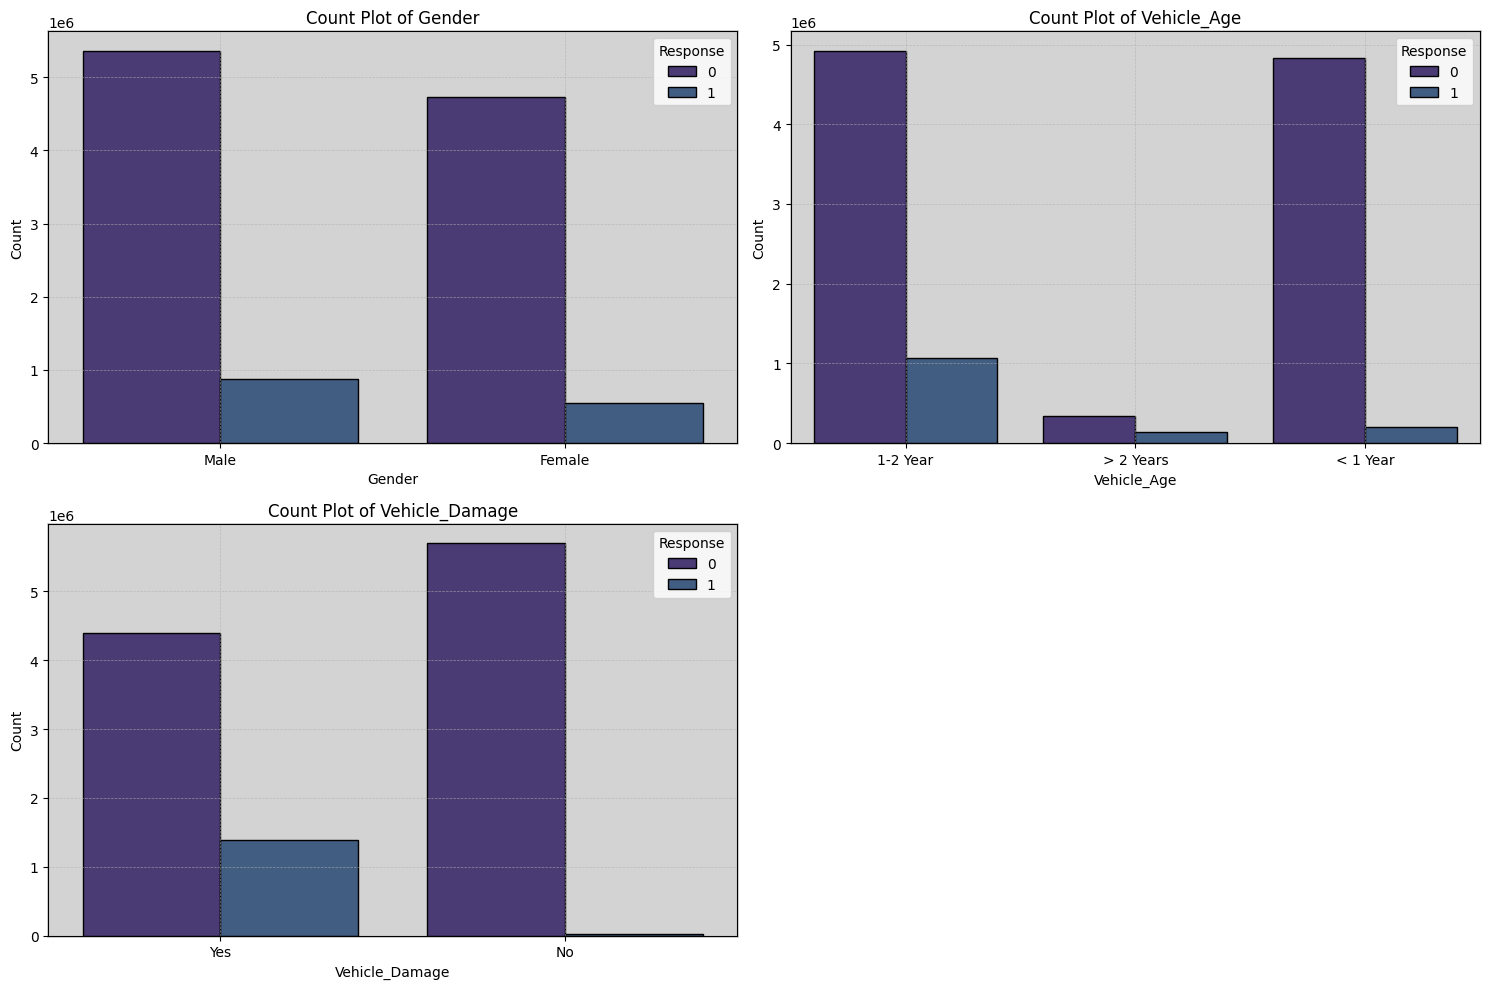

In [5]:
# Load your data
df = pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv')

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Define a color palette with attractive colors
palette = sns.color_palette("viridis")

# Create subplots for each categorical feature
categorical_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    
    # Create the count plot
    sns.countplot(data=df, x=feature, hue='Response', palette=palette, edgecolor='black')
    
    # Add background color and grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.gca().set_facecolor('lightgrey')
    
    # Add titles and labels
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    
    # Add a container with a border around each subplot
    box = plt.gca().patch
    box.set_edgecolor('lightgrey')
    box.set_linewidth(2)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Pair Plot

* This code is used to create the pairplot for the selected columns such as Region_Code, Annual_Premium, and Policy_Sales_Channel
* Firstly the figure is set to create the plot. It help to craete the plot in such a way that the plots must be readable so to take clear insights about the data.
* Then define Seaborn "Viridis" palette so, that it provides a set of attractive colors for plotting.It is one of the predefined color pelette of seaborn library.
* Then by using sns.pairplot creates the pairplot of the columns such as 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel'
* Then set the plot subtitle and set the size so that the plot is displaying clearly and we can take the deep insights about data.
* Finally by using 'plt.show()' display the plot.
* The paiplot is basically used to visualize the relationship among the numeric variables by forming.
* The paiplot generates a matrix of plot where each variable is being plotted against another.
* In the pairplot of these numeric columns the diagonal plot represented the kde plot for the numeric columns and the off diagonal plot shows the pairwise relationship between variable using scatterplot Hence, it is being used to determine the distribution among variables.

<Figure size 1500x1200 with 0 Axes>

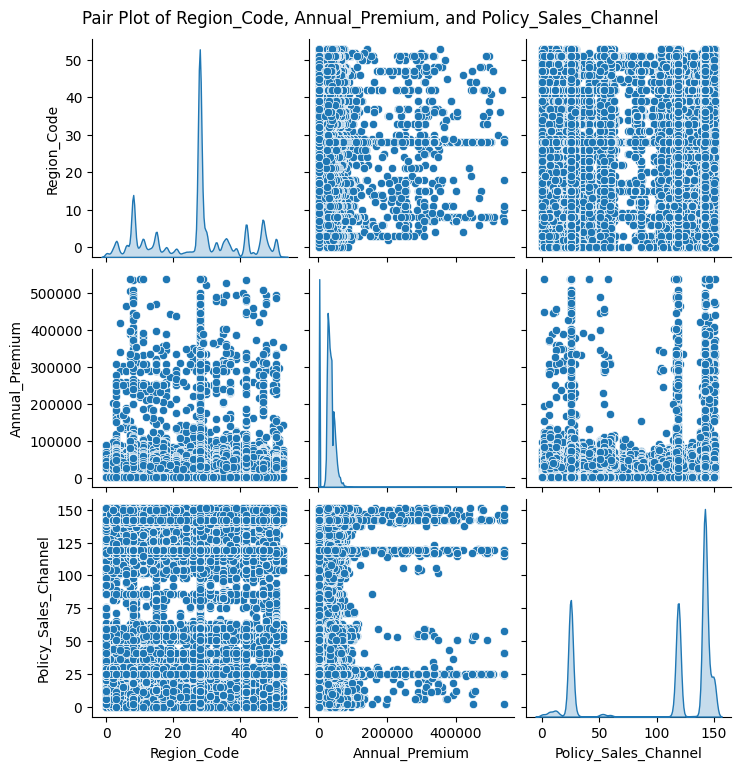

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your data
df_train = pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv')

# Convert categorical columns to numeric if needed
df_train['Region_Code'] = df_train['Region_Code'].astype('category').cat.codes
df_train['Policy_Sales_Channel'] = df_train['Policy_Sales_Channel'].astype('category').cat.codes

# Define the viridis colormap
viridis_palette = sns.color_palette("viridis", as_cmap=True)

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create a pair plot with the viridis colormap
pair_plot = sns.pairplot(df_train[['Region_Code', 'Annual_Premium', 'Policy_Sales_Channel']], 
                         diag_kind='kde', 
                         markers='o',
                         palette=viridis_palette)

# Show the plot with title
pair_plot.fig.suptitle('Pair Plot of Region_Code, Annual_Premium, and Policy_Sales_Channel', 
                       y=1.02)  # Adjust the title position
plt.show()


# Violin plot subplots

* This code is used to display the violin of numeric columns such as 'Age', 'Driving_License', 'Previously_Insured', 'Vintage'
* A violin plot helps to determine the distributions of numeric columns using density curves. In this plot the width of each curve corresponds with the approximate frequency of data points in each region. * The wider the plot represents more density hence more datapoints presents there.
* so, this plot help to determine the distribution and density of numeric variables.
* Firstly the figure is set to create the plot. It help to craete the plot in such a way that the plots must be readable so to take clear insights about the data.
* Then teh list of numeric columns such as 'Age', 'Driving_License', 'Previously_Insured', 'Vintage' is being defined.
* Then for each plot colors are defined to get clear visualization
* Then looping occurs using enumerate function so that it iterates over the numeric columns and the defined colors to create the clear plots.
* Then creates the subplots grid and adjust the layout.
* Finally displays the plot using plt.show()

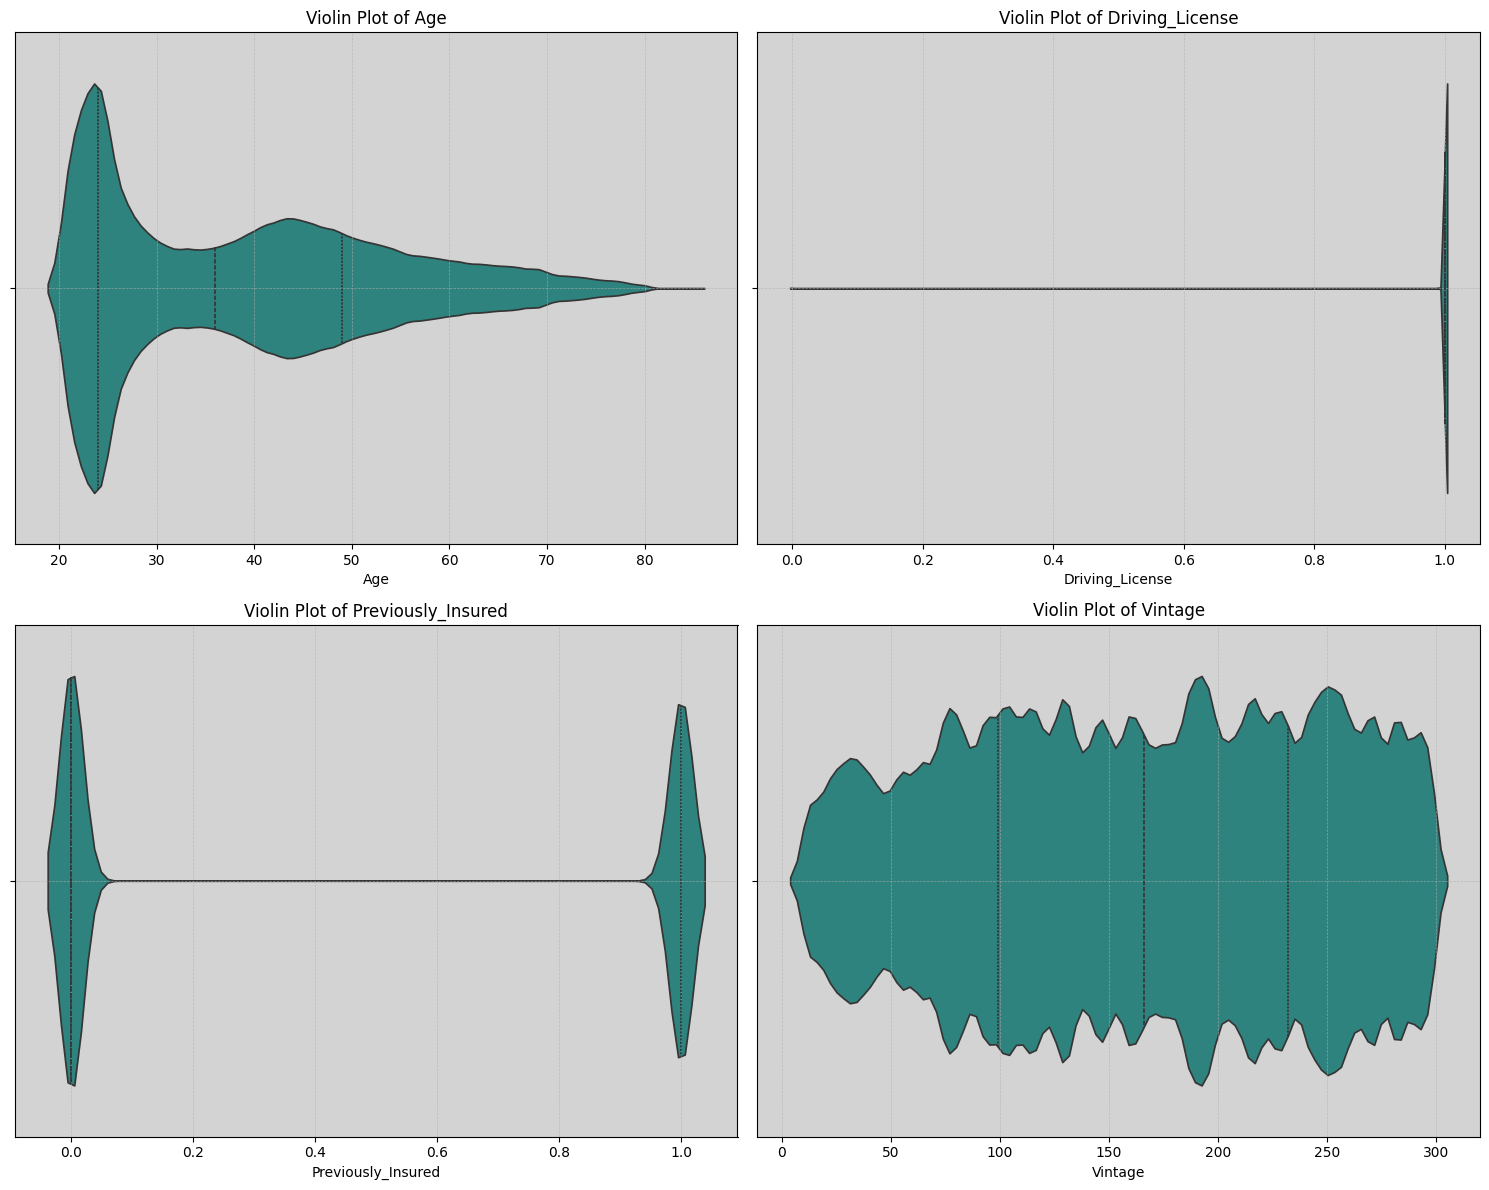

In [7]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# List of numerical features to plot
numerical_features = ['Age', 'Driving_License', 'Previously_Insured', 'Vintage']
colors = ['steelblue', 'darkorange', 'seagreen', 'crimson']

# Create subplots for each numerical feature
for i, (feature, color) in enumerate(zip(numerical_features, colors), 1):
    plt.subplot(2, 2, i)
    
    # Create the violin plot
    sns.violinplot(data=df_train, x=feature, color=color, inner="quartile", palette='viridis')
    
    # Add background color and grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.gca().set_facecolor('lightgrey')
    
    # Add titles and labels
    plt.title(f'Violin Plot of {feature}')
    plt.xlabel(feature)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Boxplot Subplots to Detect Outliers

* This plot is being used to create the boxplot of numeric features across different categories.
* the boxplot is also used to detect the presence of outliers.
* Firstly the figure is set to create the plot. It help to craete the plot in such a way that the plots must be readable so to take clear insights about the data.
* Then the tuple of categorical and numerical columns is being defined so that the boxplot of them are being defined.
* The numeric and categorical columns which is defined in the form of tuple as ('Age', 'Gender'),('Annual_Premium', 'Gender'),('Vintage', 'Gender'),('Region_Code', 'Gender'),('Age', 'Vehicle_Age'),('Annual_Premium', 'Vehicle_Age'),('Vintage', 'Vehicle_Age'),('Region_Code', 'Vehicle_Age'),('Age', 'Vehicle_Damage'),('Annual_Premium', 'Vehicle_Damage'),('Vintage', 'Vehicle_Damage'), ('Region_Code', 'Vehicle_Damage')
* Then it loops through each of the categorical variable which is taken and using the enumerate function
* Then creates the subplots grid and adjust the layout.
* As this code generates the boxplot of the numeric and categorical columns so we can also detect the outliers by this plot such as the points which are outside of the whiskers are mainly counted as outliers

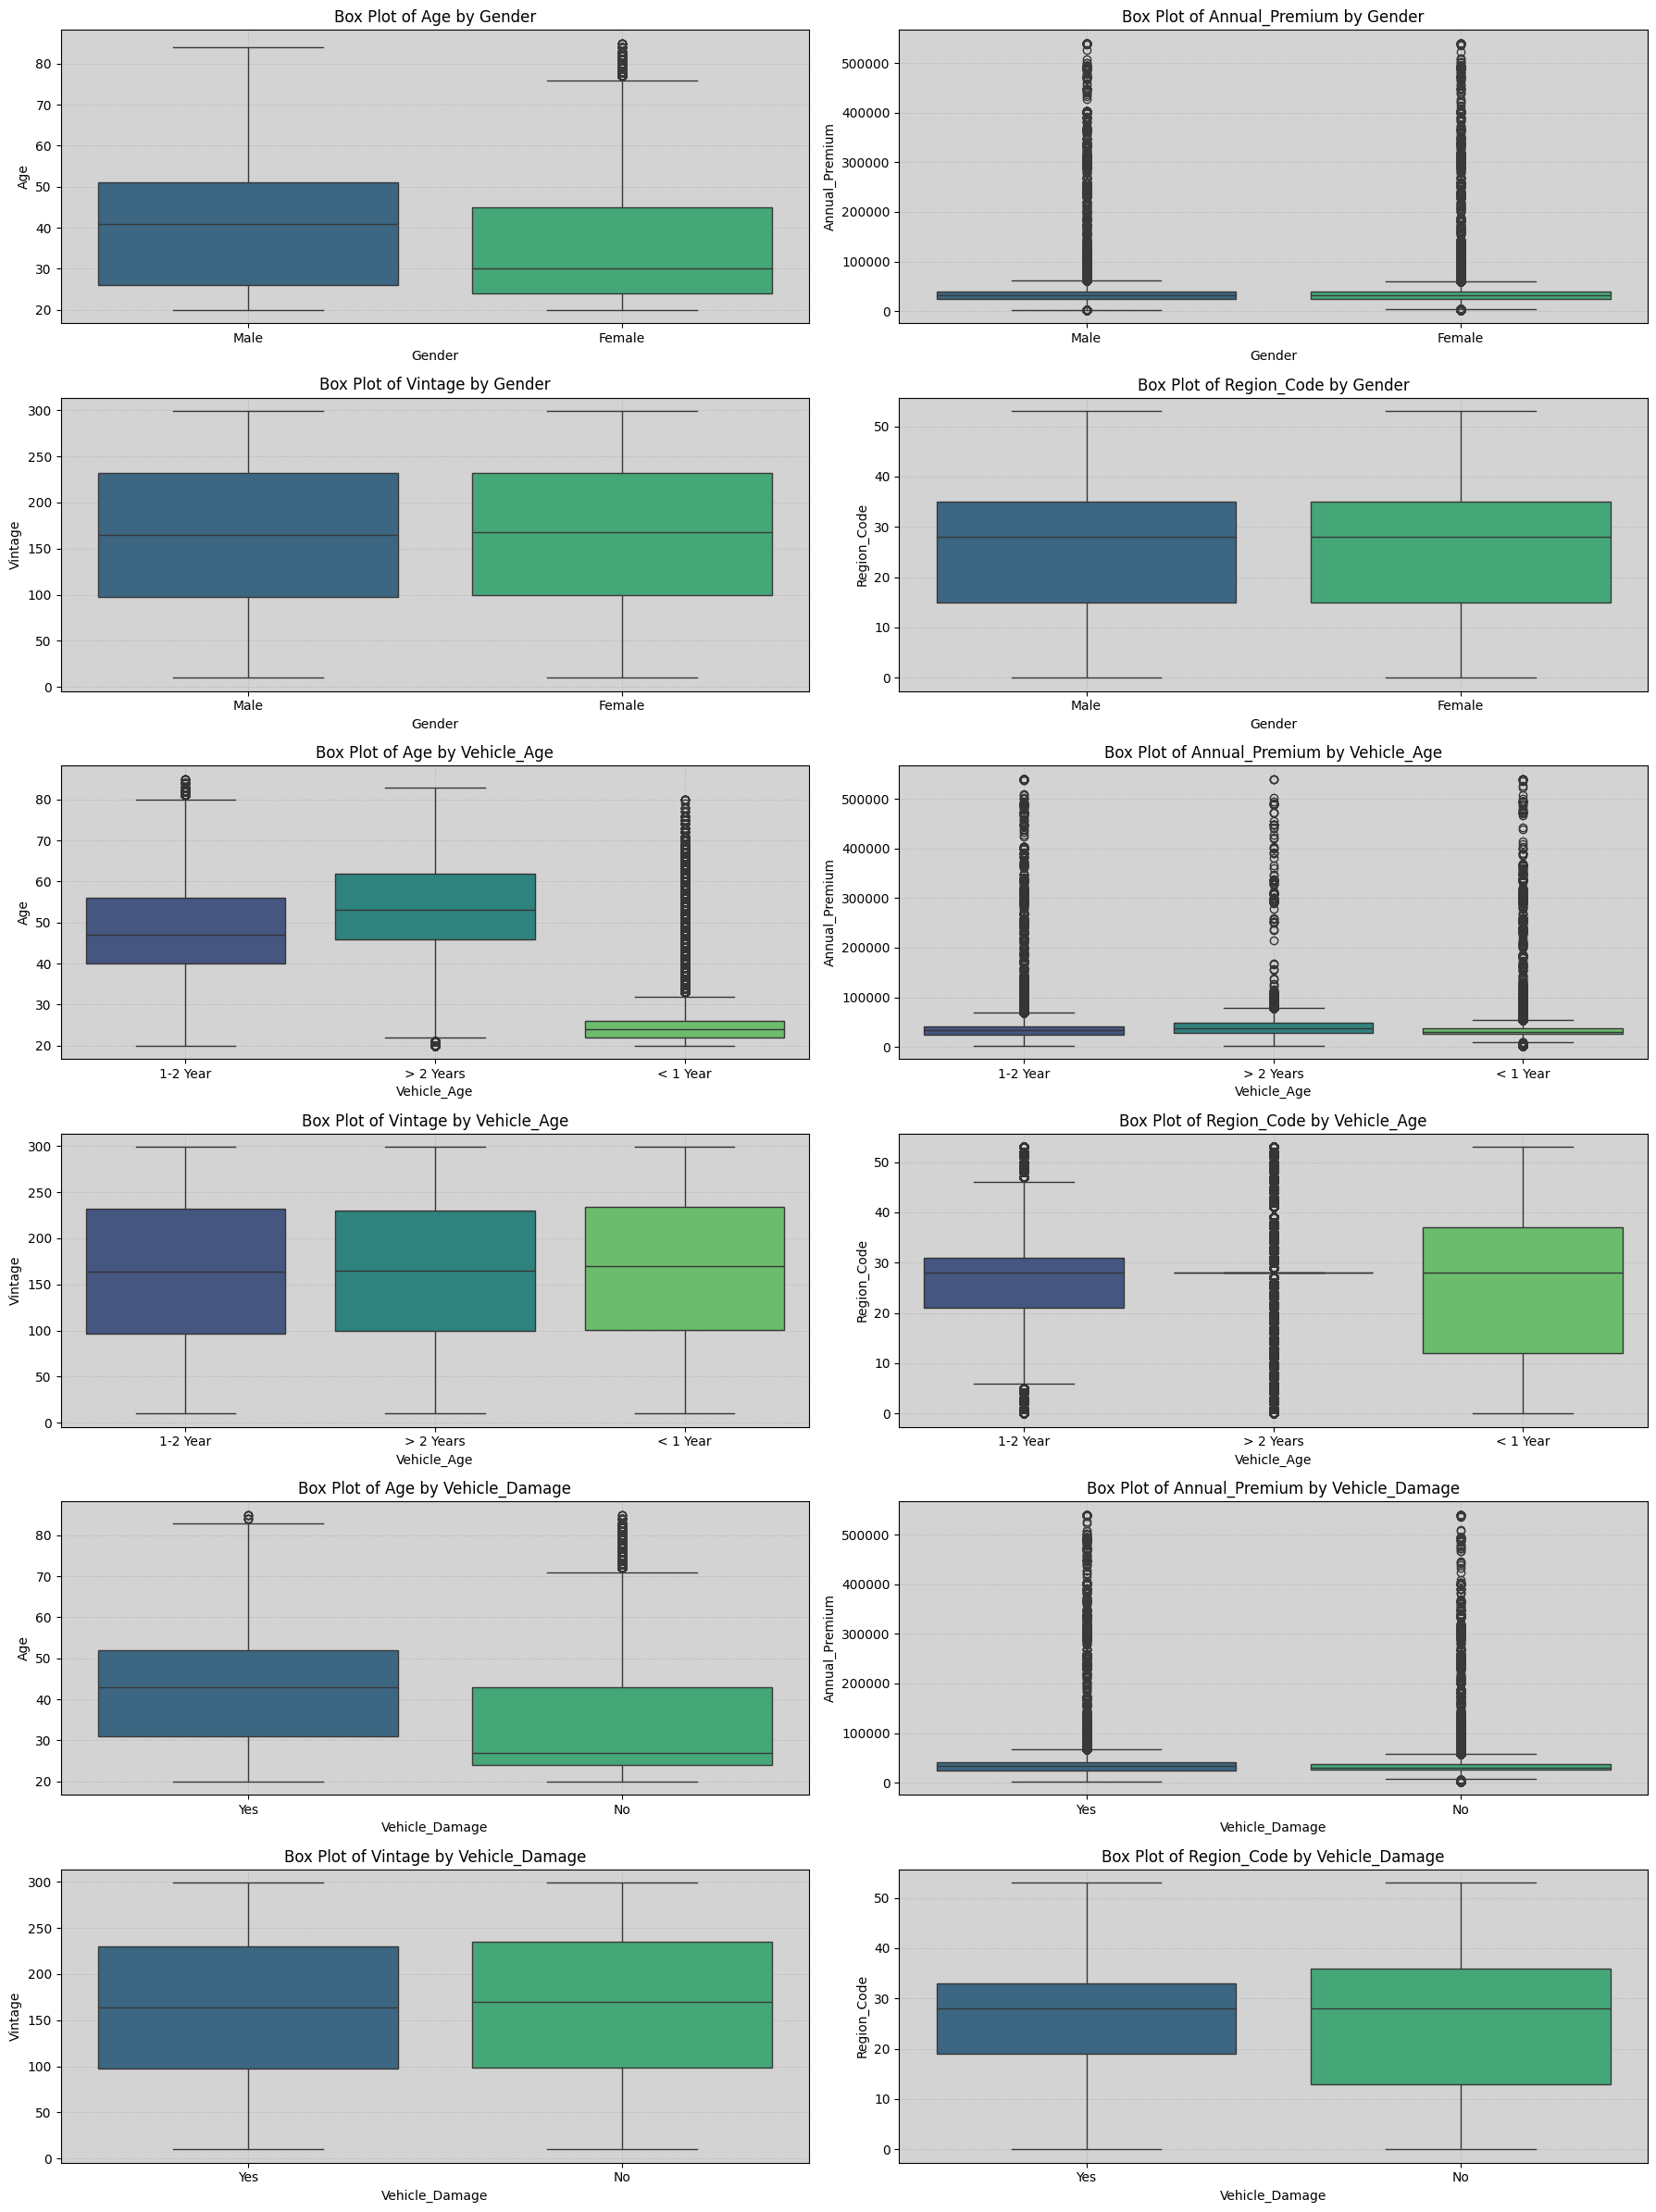

In [8]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 24))

# Define the pairs of numeric and categorical columns
plots = [
    ('Age', 'Gender'),
    ('Annual_Premium', 'Gender'),
    ('Vintage', 'Gender'),
    ('Region_Code', 'Gender'),
    ('Age', 'Vehicle_Age'),
    ('Annual_Premium', 'Vehicle_Age'),
    ('Vintage', 'Vehicle_Age'),
    ('Region_Code', 'Vehicle_Age'),
    ('Age', 'Vehicle_Damage'),
    ('Annual_Premium', 'Vehicle_Damage'),
    ('Vintage', 'Vehicle_Damage'),
    ('Region_Code', 'Vehicle_Damage')
]

# Create subplots for each pair
for i, (num_col, cat_col) in enumerate(plots, 1):
    plt.subplot(6, 2, i)
    
    # Create the box plot
    sns.boxplot(data=df_train, x=cat_col, y=num_col, palette='viridis')
    
    # Add background color and grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.gca().set_facecolor('lightgrey')
    
    # Add titles and labels
    plt.title(f'Box Plot of {num_col} by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(num_col)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Winsorized Data with Box Plot Subplots

* This code is used to create the box plot
* Firstly the winsorization technique is being applied using this code before plotting the boxplot of the numeric variables.
* winsorization involves the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers.
* It is the process of replacing the extreme values of statistical data in order to limit the effect of the outliers on the calculations.
* The mean value calculated after such replacement of the extreme values is called winsorized mean.
* winsorization process involves replacing the outlier values with the nearest non-outlier values.
* The winsorization method is used to limit the outliers without removing the rows of the data.
* winsorize_column(column, limits=(0.01, 0.01)): This function is used to apply winsorization to the columns of the data so that it limits the outliers without removing rows.
* Loop through each column using the enumerate function.
* Then the figure is set to craete the plot. It help to craete the plot in such a way that the plots must be readable so to take clear insights about the data.
* Then the boxplot formed of numeric and categorical columns which are taken in the form of tuple.
* Then creates the subplots grid and adjust the layout.
* Finally plot is being displayed using plt.show()

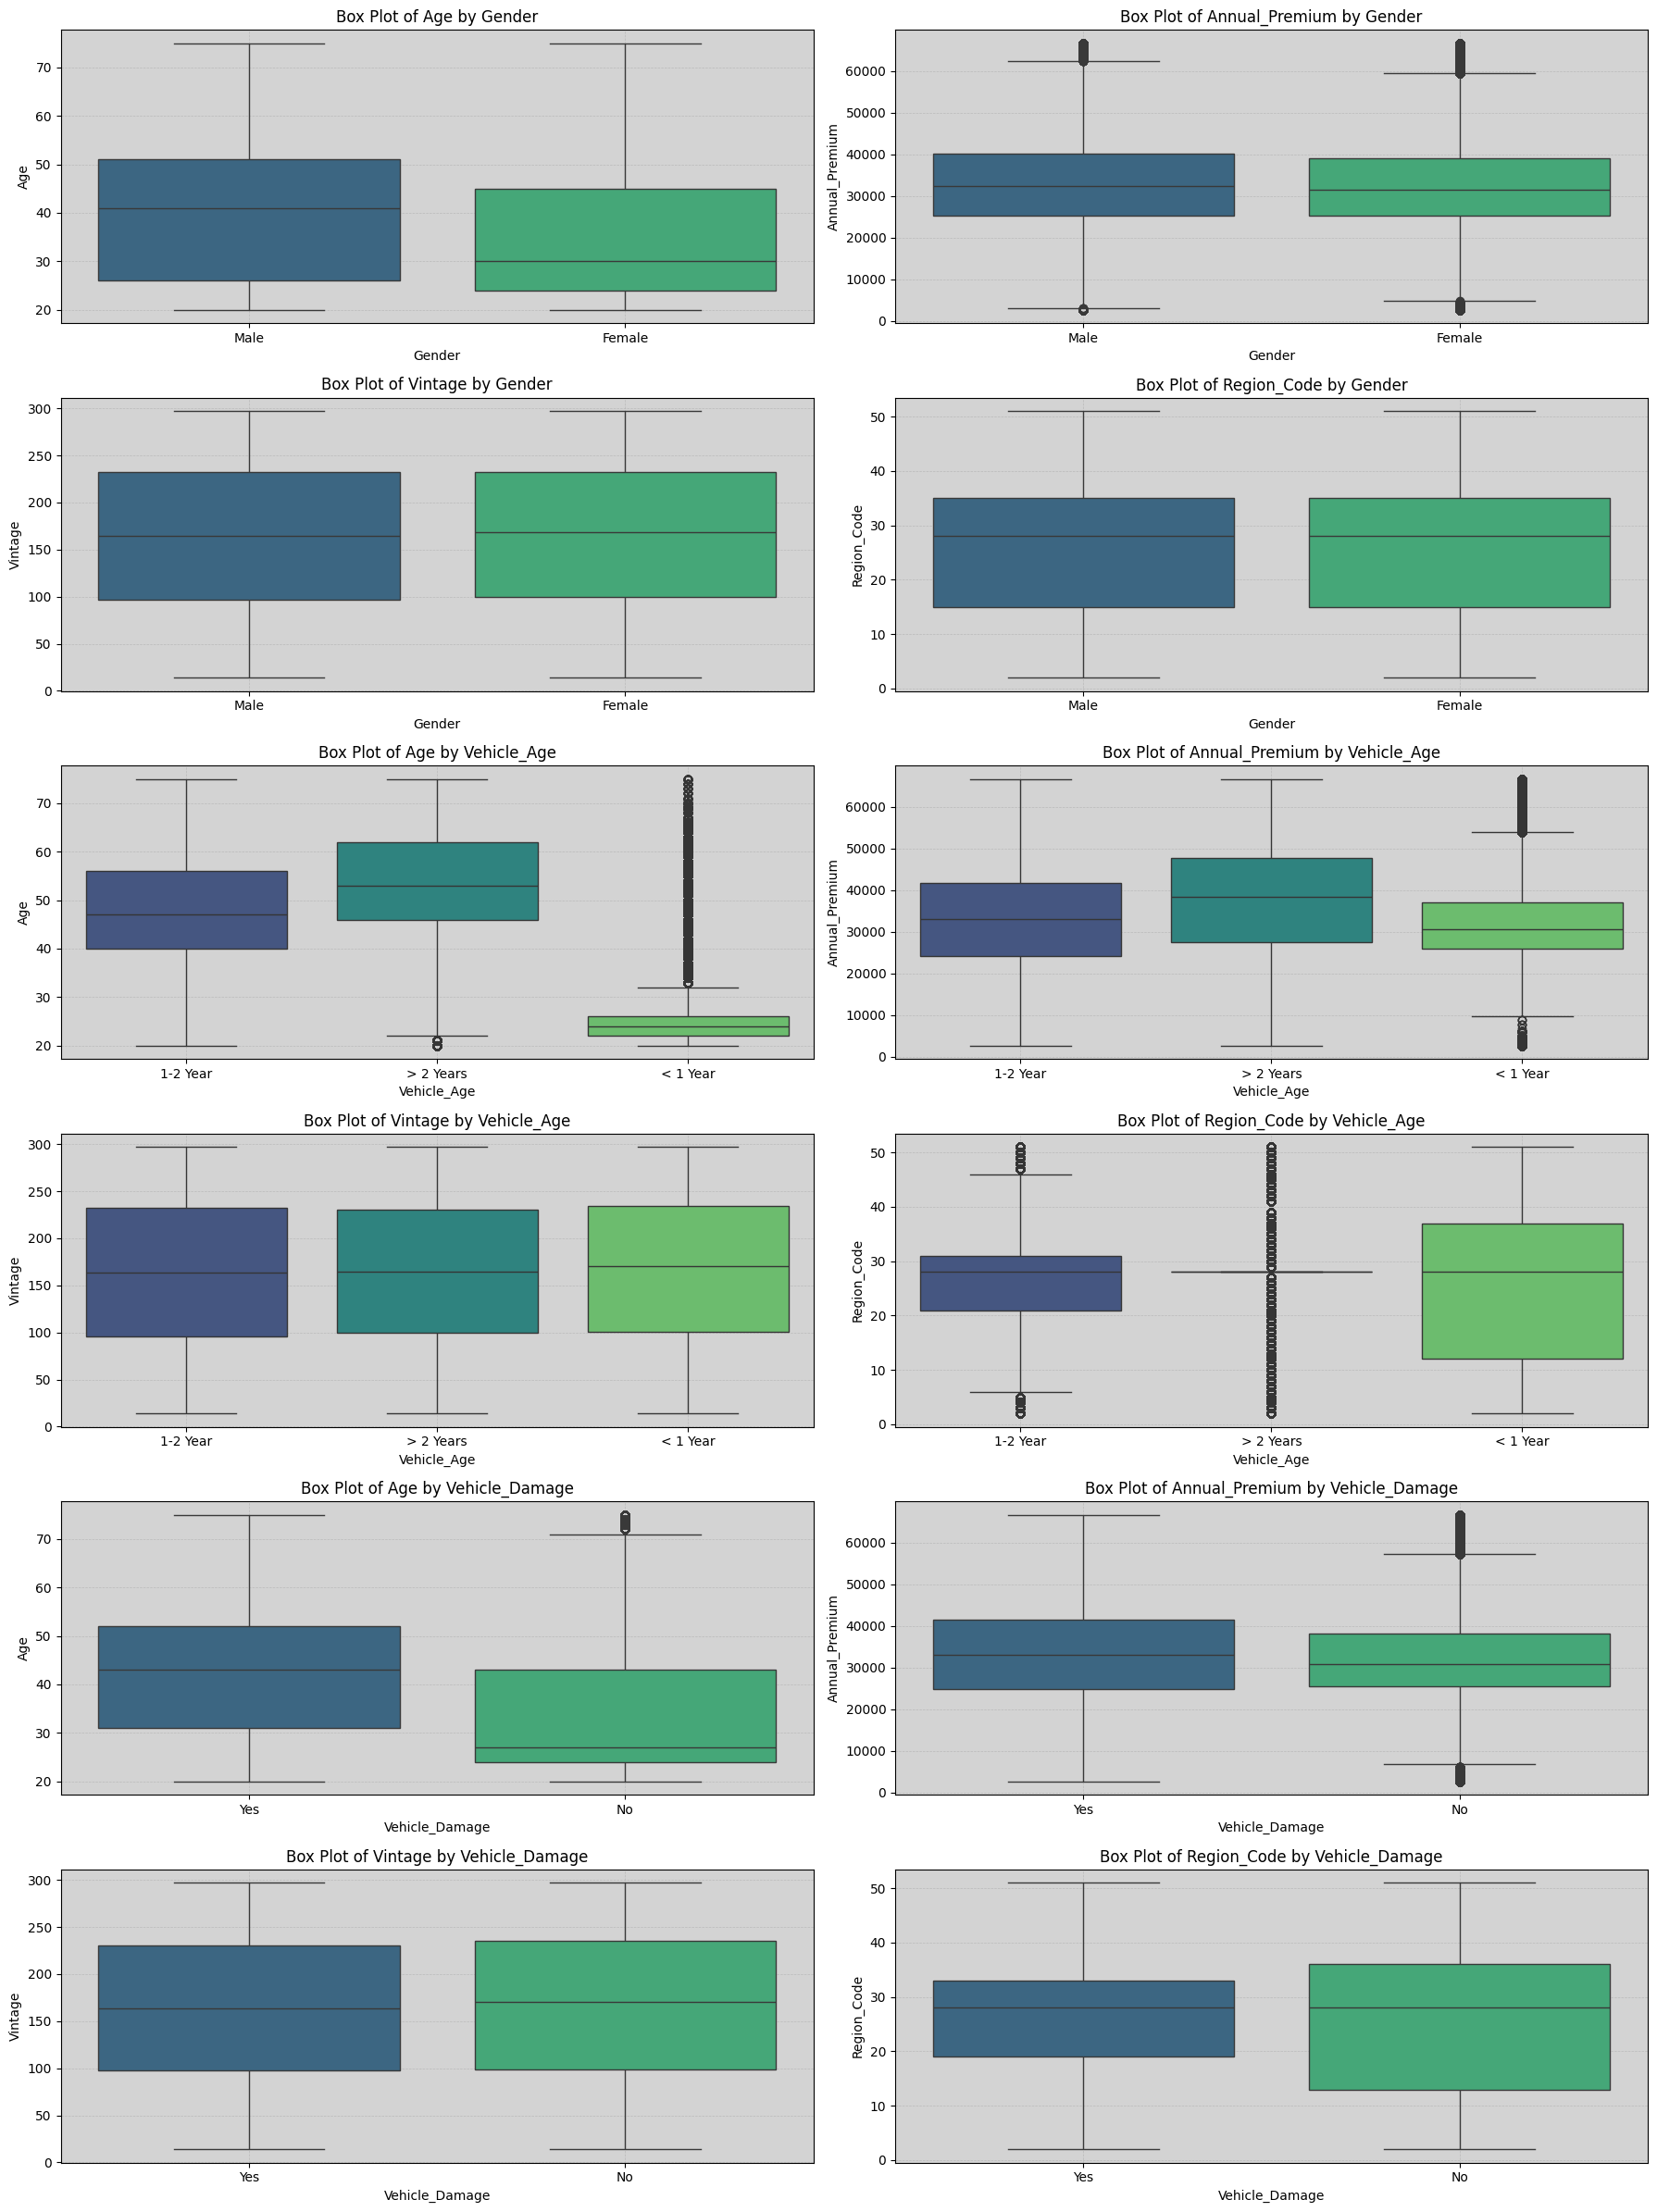

In [9]:
# Function to apply Winsorization to numeric columns
def winsorize_column(column, limits=(0.01, 0.01)):
    return winsorize(column, limits=limits)

# Apply Winsorization to numeric columns
numeric_cols = ['Age', 'Annual_Premium', 'Vintage', 'Region_Code']
for col in numeric_cols:
    df_train[col] = winsorize_column(df_train[col])

# Set up the matplotlib figure
plt.figure(figsize=(18, 24))

# Define the pairs of numeric and categorical columns
plots = [
    ('Age', 'Gender'),
    ('Annual_Premium', 'Gender'),
    ('Vintage', 'Gender'),
    ('Region_Code', 'Gender'),
    ('Age', 'Vehicle_Age'),
    ('Annual_Premium', 'Vehicle_Age'),
    ('Vintage', 'Vehicle_Age'),
    ('Region_Code', 'Vehicle_Age'),
    ('Age', 'Vehicle_Damage'),
    ('Annual_Premium', 'Vehicle_Damage'),
    ('Vintage', 'Vehicle_Damage'),
    ('Region_Code', 'Vehicle_Damage')
]

# Create subplots for each pair
for i, (num_col, cat_col) in enumerate(plots, 1):
    plt.subplot(6, 2, i)
    
    # Create the box plot
    sns.boxplot(data=df_train, x=cat_col, y=num_col, palette='viridis')
    
    # Add background color and grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.gca().set_facecolor('lightgrey')
    
    # Add titles and labels
    plt.title(f'Box Plot of {num_col} by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(num_col)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Pie Chart


* This code is used to create the pie chart of the categorical columns such as 'Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Response'.
* Firstly define Seaborn "viridis" palette so, that it provides a set of attractive colors for plotting.It is one of the predefined color pelette of seaborn library.
* Then the figure is set to create the plot. It help to craete the plot in such a way that the plots must be readable so to take clear insights about the data.
* Then loop through each defined categorical columns such as 'Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Response' using the enumeate function.
* Then creates the grid of subplot and set the title and ajust the layout for creating subplot
* Finally Displays the plot using plt.show()

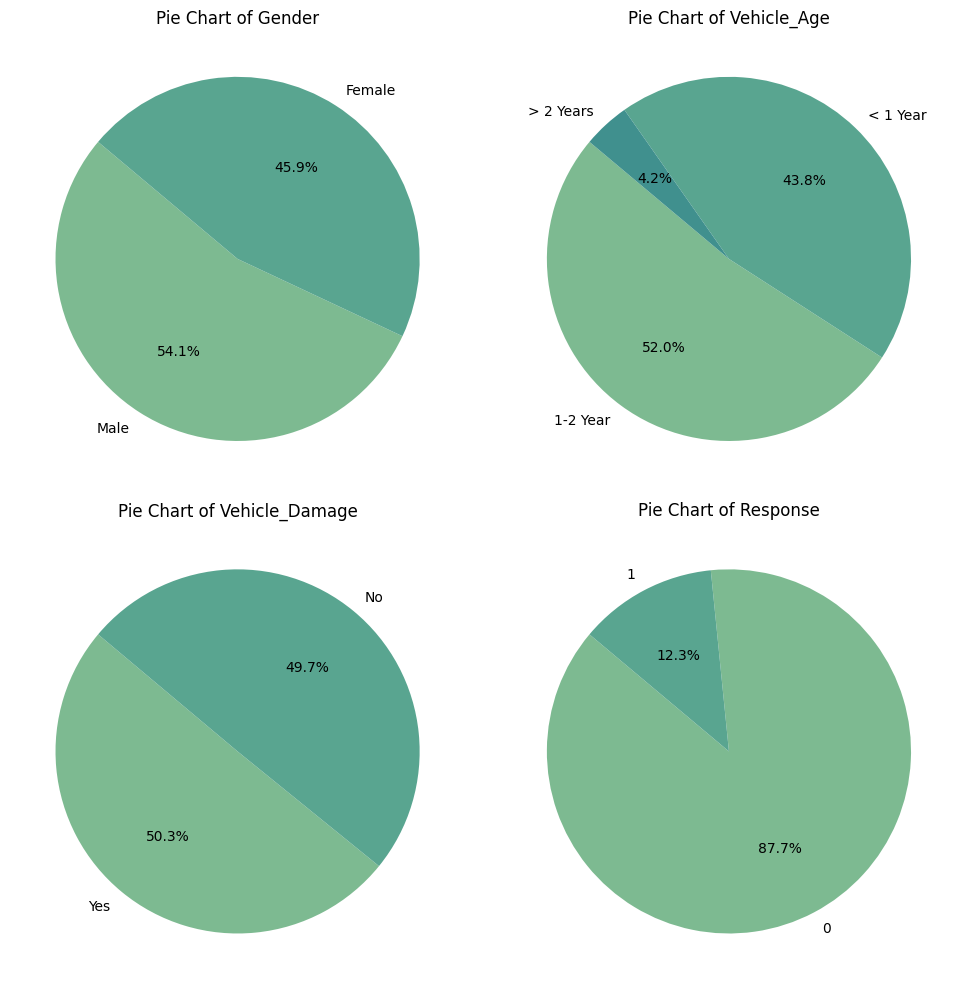

In [10]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Define a color palette with attractive colors
palette = sns.color_palette("crest")

# Create subplots for each categorical feature
categorical_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Response']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    
    # Get the count of each category
    counts = df_train[feature].value_counts()
    
    # Create the pie chart
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=palette)
    
    # Add titles
    plt.title(f'Pie Chart of {feature}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Feature Engineering

* Import Necessary Libraries: Ensure you have all the necessary imports at the top of your script.
* Improved Frequency Encoding: Frequency encoding is correctly implemented. Ensure you handle the case when a Region_Code might not be present in the training set but appears in the test set.
* Handling Missing Values: Add handling for any potential missing values, especially after transformations.

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def feature_engineering(df):
    # Ensure no missing values in categorical features before mapping
    df['Vehicle_Age'].fillna('Unknown', inplace=True)
    df['Vehicle_Damage'].fillna('Unknown', inplace=True)
    df['Gender'].fillna('Unknown', inplace=True)
    
    # Transforming categorical variables
    df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
    df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

    # Ensure no missing values in numerical features after transformation
    df['Vehicle_Age'].fillna(df['Vehicle_Age'].median(), inplace=True)
    df['Vehicle_Damage'].fillna(df['Vehicle_Damage'].median(), inplace=True)
    df['Gender'].fillna(df['Gender'].median(), inplace=True)
    
    # Create interaction features
    df['Age*Annual_Premium'] = df['Age'] * df['Annual_Premium']
    df['Region_Code*Policy_Sales_Channel'] = df['Region_Code'] * df['Policy_Sales_Channel']
    df['Age*Vehicle_Damage'] = df['Age'] * df['Vehicle_Damage']
    df['Annual_Premium*Vehicle_Age'] = df['Annual_Premium'] * df['Vehicle_Age']
    
    # Binning Annual_Premium
    bins = [0, 10000, 30000, 50000, np.inf]
    labels = [0, 1, 2, 3]
    df['Annual_Premium_binned'] = pd.cut(df['Annual_Premium'], bins=bins, labels=labels)
    
    # Frequency encoding for Region_Code
    freq = df['Region_Code'].value_counts(normalize=True)
    df['Region_Code_freq'] = df['Region_Code'].map(freq)
    
    # Label encoding for categorical features
    cat_features = ['Annual_Premium_binned']
    le = LabelEncoder()
    for feature in cat_features:
        df[feature] = le.fit_transform(df[feature].astype(str))
    
    return df


# Efficient Model Training and Stacking for Enhanced Predictions

* Imports and Data Preparation:
* Ensure all necessary imports are included.
* Verify that df_train and df_test are defined correctly and that df_test has the same preprocessing applied as df_train.
* Model Training and Validation:
* Cross-validation is set up correctly for evaluating the LightGBM model.
* The roc_auc metric is used, which is appropriate for binary classification.
* Stacking Model:
* A stacking model is defined, but make sure all estimators are properly trained and validated.

In [12]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import StackingClassifier

# Ensure you have already defined the feature_engineering function
def feature_engineering(df):
    # Transforming categorical variables
    df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
    df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

    # Create interaction features
    df['Age*Annual_Premium'] = df['Age'] * df['Annual_Premium']
    df['Region_Code*Policy_Sales_Channel'] = df['Region_Code'] * df['Policy_Sales_Channel']
    df['Age*Vehicle_Damage'] = df['Age'] * df['Vehicle_Damage']
    df['Annual_Premium*Vehicle_Age'] = df['Annual_Premium'] * df['Vehicle_Age']
    
    # Binning Annual_Premium
    bins = [0, 10000, 30000, 50000, np.inf]
    labels = [0, 1, 2, 3]
    df['Annual_Premium_binned'] = pd.cut(df['Annual_Premium'], bins=bins, labels=labels)
    
    # Frequency encoding for Region_Code
    freq = df['Region_Code'].value_counts(normalize=True)
    df['Region_Code_freq'] = df['Region_Code'].map(freq)
    
    # Label encoding for categorical features
    cat_features = ['Annual_Premium_binned']
    le = LabelEncoder()
    for feature in cat_features:
        df[feature] = le.fit_transform(df[feature].astype(str))
    
    return df

# Apply feature engineering
df_train = pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv')
train_data_fe = feature_engineering(df_train)
test_data_fe = feature_engineering(df_test)

# Prepare the data for modeling
X = train_data_fe.drop(['id', 'Response'], axis=1)
y = train_data_fe['Response']

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define LightGBM parameters and model
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'random_state': 42,
    'learning_rate': 0.05,
    'num_leaves': 40,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.9,
    'lambda_l1': 0.2,
    'lambda_l2': 0.2,
    'min_child_samples': 20,
    'n_estimators': 1000
}

# LightGBM model
lgb_model = lgb.LGBMClassifier(**params)

# Train the LightGBM model using cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lgb_model, X_train, y_train, cv=kfold, scoring='roc_auc', verbose=1)

print(f'Cross-validation ROC AUC scores: {cv_scores}')
print(f'Mean ROC AUC score: {cv_scores.mean()}')

# Fit the model on the entire training data
lgb_model.fit(X_train, y_train)

# Make predictions on the validation data
val_predictions = lgb_model.predict_proba(X_val)[:, 1]
val_auc = roc_auc_score(y_val, val_predictions)
print(f'Validation ROC AUC score: {val_auc}')

# Create a stacking model
estimators = [
    ('lgbm', lgb_model),
    ('log_reg', LogisticRegression(random_state=42))
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=kfold)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions with the stacking model (optional, for further evaluation or submission)
stacking_predictions = stacking_model.predict_proba(X_val)[:, 1]
stacking_auc = roc_auc_score(y_val, stacking_predictions)
print(f'Stacking Model Validation ROC AUC score: {stacking_auc}')


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Info] Number of positive: 905638, number of negative: 6457432
[LightGBM] [Info] Auto-choosin

# Make predictions on the test data with stacking Model

In [13]:

# Make predictions on the validation data with stacking model
stacking_val_predictions = stacking_model.predict_proba(X_val)[:, 1]
stacking_val_auc = roc_auc_score(y_val, stacking_val_predictions)
print(f'Stacking model validation ROC AUC score: {stacking_val_auc}')

# Make predictions on the test data with stacking model
test_predictions = stacking_model.predict_proba(test_data_fe.drop(['id'], axis=1))[:, 1]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
Stacking model validation ROC AUC score: 0.880211631293193
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


In [14]:
print(f'Cross-validation ROC AUC scores: {cv_scores}')
print(f'Mean ROC AUC score: {cv_scores.mean()}')
print(f'Stacking model validation ROC AUC score: {stacking_val_auc}')

Cross-validation ROC AUC scores: [0.88025879 0.88027016 0.88022159 0.87954734 0.88020406]
Mean ROC AUC score: 0.8801003868177941
Stacking model validation ROC AUC score: 0.880211631293193


# Create the Submission File

In [15]:
# Create submission file
submission = pd.DataFrame({
    'id': test_data_fe['id'],
    'Response': test_predictions
})

# Save submission to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully.")
submission.head()

Submission file created successfully.


,id,Response
0,11504798,0.025175
1,11504799,0.527698
2,11504800,0.166630
3,11504801,0.024124
4,11504802,0.035744


Binary Classification of Insurance Cross-Selling Competition Data is well-structured and covers key steps from data exploration to model evaluation and submission. Here’s a more detailed breakdown of each step and what you should consider:

1. Detailed Data Overview
Objective: Understand the structure, types, and distribution of your data.
Steps:
* Check for missing values and basic statistics.
* Identify the types of features (categorical, numerical).
* Examine class distribution in the target variable.
2. Data Visualization
* Countplot: To visualize the distribution of categorical features and how they relate to the target variable.
* Pairplot: To explore relationships between numerical features and check for potential correlations.
* Violin Plot: To compare distributions of numerical features across different categories.
* Pie Chart: To visualize the proportion of classes in the target variable.

3. Outlier Detection and Winsorization
* Boxplot: To visualize the presence of outliers in numerical features.
* Winsorization: To handle outliers by capping extreme values to reduce their impact on model performance.

4. Enhanced Feature Engineering
* Transform categorical variables: Convert to numeric if needed.
* Interaction Features: Create new features that capture interactions between existing features.
* Binning: For features like Annual_Premium.
* Frequency Encoding: For categorical features.

5. Model Training and Stacking
* Model Training: Train base models using algorithms like LightGBM and validate their performance using cross-validation.
* Stacking: Combine multiple models to leverage their individual strengths for improved performance.

6. Create the Submission File
* Generate Predictions: Use the final model to make predictions on the test set.
* Format the Submission: Prepare the output in the required format for submission.

Summary
* Data Exploration and Visualization: Gain insights and understand data distributions.
* Outlier Detection and Feature Engineering: Enhance model performance with better features.
* Model Training and Validation: Use LightGBM and stacking to improve predictions.
* Submission: Prepare and save predictions for the competition.